#### Project Description

The Capstone Project is a group project, and will be used in place of a Final Exam.

Form teams of 3-4 people.

Sign into Kaggle, then look through their 'competitions' or their 'datasets' for one that interests your team.  There are many types of projects, some covering machine learning topics that we did not cover in class.  However, you should be able to find projects in:

1) Map/Reduce

2) Linear Regression

3) Logistic Regression

4) Clustering

You do not have to choose one of these, you can branch out if you want.

Download the data from Kaggle.  If you are using data from one of the competitions, sign up for the competition, download the data (then solve the problem and submit your results!).

Perform the suggested analysis, then report on your work.  If you can, compare your results with other submissions to Kaggle.

When you are done, write a report indicating:

1) ~~Who is on your team! (very important)~~
#### Team Members
- ##### Simon Nguyen , Eduardo Castro Becerra , Bryan Martinez Ramirez & Myo Aung

2) ~~Which dataset/competition you chose.~~
We employed a dataset consisting of 1,000,000 entries and 8 columns, with the objective of predicting fraudulent transactions, denoted by the 'fraud' variable. This dataset served as a comprehensive resource for exploring transaction patterns and developing predictive models to effectively detect fraudulent activities.

3) ~~What approach you took.  What steps did you take to clean the data, improve the results, etc.~~
In our approach, we began with exploratory data analysis (EDA) to gain insights into the dataset's structure and distributions. This involved tasks such as checking for missing values, examining summary statistics, visualizing variable distributions using histograms, and estimating correlation coefficients between features and the target variable. After preprocessing the data, which included feature scaling and splitting into training and test sets, we opted for a K Nearest Neighbors (KNN) classifier as our primary model for predicting fraudulent transactions. Evaluation of the model's performance was done using accuracy scores, confusion matrices, and classification metrics.

4) ~~What are your results.  How did you choose to visualize the results (perhaps show  different graphs/charts/views to highlight your conclusions)~~
Our findings revealed impressive results, with the KNN model achieving accuracy scores of 99.87% on the test set and 99.96% on the training set. Examination of confusion matrices indicated that the model made 299,624 correct predictions out of 300,000 total instances, with only 376 incorrect predictions. Further analysis of classification metrics such as precision, recall, and F1-score demonstrated the model's high efficacy in distinguishing between fraudulent and non-fraudulent transactions. Additionally, optimization of the K value suggested that the model performs slightly better with k=5 compared to k=3.

5) ~~How did your results compare (if that information is available)~~
Comparing our model's accuracy with null accuracy, we found a significant difference, with the model's accuracy score (99.87%) surpassing the null accuracy score (91.30%). This underscores the model's effectiveness in predicting class labels and its superiority over random guessing in detecting fraudulent transactions.

6) ~~What worked well, what not so well.~~
While our KNN model exhibited strong performance, we identified both strengths and weaknesses. The model demonstrated high accuracy and effectively detected fraudulent transactions. The exploratory data analysis provided valuable insights into feature correlations and distributions, aiding in model interpretation and validation. However, despite its overall effectiveness, there are opportunities for further optimization and exploration of alternative algorithms to enhance performance and address potential limitations, such as scalability and computational efficiency. Additionally, conducting further analysis of misclassified instances could offer insights into areas for model improvement and feature engineering.

When you are done, submit the report to Canvas.  

#### Team Members
- ##### Simon Nguyen , Eduardo Castro Becerra , Bryan Martinez Ramirez & Myo Aung

In [1]:
## required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

In [15]:
df = pd.read_csv('card_transdata.csv')

In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


The DataFrame head serves as an initial overview, allowing quick assessment of column names, data types, and sample values. It helps users understand the dataset's structure and identify potential issues like missing values or unexpected data formats.

In [ ]:
df.shape

(1000000, 8)

The shape attribute provides a concise summary of the DataFrame's dimensions, which is useful for understanding the dataset's size and structure at a glance

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


The DataFrame information offers comprehensive insights into the dataset's structure, including column names, data types, and memory usage. It helps users identify potential data quality issues, such as missing values or incorrect data types.

In [17]:
df.dropna(inplace = True)
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [18]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


Descriptive statistics offer valuable insights into the central tendency, dispersion, and distribution of numerical variables. They help users understand the data's variability, detect outliers, and identify potential data quality issues.

In [19]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

The absence of null values indicates data completeness and reduces the need for data imputation or cleaning. It suggests that all columns have values for all observations, enhancing the dataset's usability and reliability

In [20]:
df['fraud'].value_counts() / np.float64(len(df))


fraud
0.0    0.912597
1.0    0.087403
Name: count, dtype: float64

The frequency distribution of the 'fraud' column provides insights into the class distribution, highlighting the proportion of fraudulent transactions in the dataset. It helps assess the balance between classes and informs the choice of evaluation metrics for classification models.

In [21]:
print(round(df.describe(),2))

       distance_from_home  distance_from_last_transaction  \
count          1000000.00                      1000000.00   
mean                26.63                            5.04   
std                 65.39                           25.84   
min                  0.00                            0.00   
25%                  3.88                            0.30   
50%                  9.97                            1.00   
75%                 25.74                            3.36   
max              10632.72                        11851.10   

       ratio_to_median_purchase_price  repeat_retailer   used_chip  \
count                      1000000.00       1000000.00  1000000.00   
mean                             1.82             0.88        0.35   
std                              2.80             0.32        0.48   
min                              0.00             0.00        0.00   
25%                              0.48             1.00        0.00   
50%                           

Upon examining the output of the describe() function, we discover several key insights into our dataset. Firstly, we observe that all features have a count of 1,000,000, indicating a complete dataset without any missing values. We found out that the mean values provide a central tendency for each feature, such as an average distance_from_home of 26.63 and a fraud rate of 0.09. Additionally, the standard deviations reveal the spread of data around the mean, with features like distance_from_last_transaction exhibiting a higher variability (std = 25.84). By examining the minimum and maximum values, we gain an understanding of the range of each feature, such as distance_from_home ranging from 0.00 to 10632.72. Furthermore, percentiles offer insights into the distribution of data, highlighting potential skewness or outliers. Overall, this detailed analysis provides valuable information about the characteristics of our dataset, aiding in further exploration and understanding

#### Data Visualization


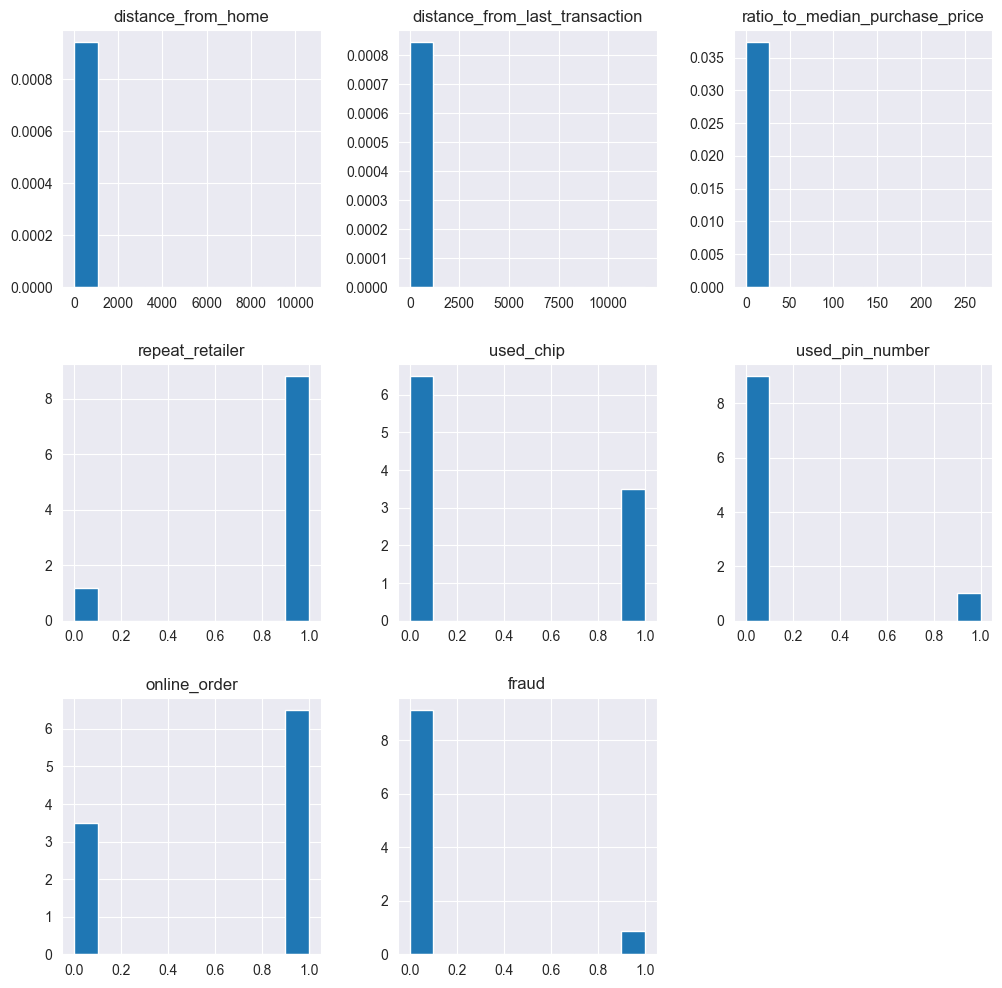

In [22]:
df.hist(bins=10, figsize=(12,12), density=True)
plt.show()

Upon examining the histograms generated using the hist() function, we observe the distribution of each feature in the dataset. The histograms provide a visual representation of the frequency distribution of values for each attribute, allowing us to identify patterns and potential outliers. For instance, the histogram for distance_from_home indicates that a majority of transactions have distances clustered around lower values, with a right-skewed distribution. Similarly, histograms for other features reveal their respective distributions and spread of values.

Moving on to estimating correlation coefficients, we analyze the relationships between pairs of variables in the dataset. By calculating correlation coefficients, we can quantify the strength and direction of linear relationships between variables. A correlation coefficient close to 1 indicates a strong positive correlation, while a value close to -1 suggests a strong negative correlation. A coefficient near 0 implies weak or no linear correlation. This analysis enables us to identify potentially influential variables and understand how they interact with each other within the dataset.

In [24]:
correlation=df.corr()

Since our target variable is "fraud," it's essential to assess the correlation between each attribute and the "fraud" variable.

In [25]:
correlation['fraud'].sort_values(ascending=False)

fraud                             1.000000
ratio_to_median_purchase_price    0.462305
online_order                      0.191973
distance_from_home                0.187571
distance_from_last_transaction    0.091917
repeat_retailer                  -0.001357
used_chip                        -0.060975
used_pin_number                  -0.100293
Name: fraud, dtype: float64

Interpretation of Data

A correlation coefficient close to +1 indicates a strong positive correlation, implying that "fraud" has the highest correlation with "ratio_to_median_purchase_price."

Conversely, a correlation coefficient close to -1 indicates a strong negative correlation. When the coefficient is close to 0, there is no correlation.


##### Corelation Heat Map

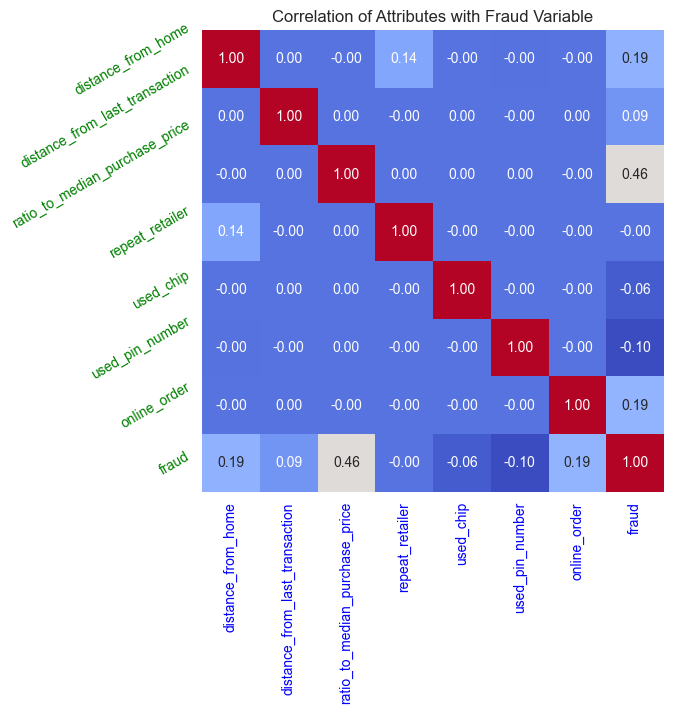

In [28]:
plt.figure(figsize=(8, 6))
plt.title('Correlation of Attributes with Fraud Variable')
heatmap = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white', cmap='coolwarm', cbar=False)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, color='blue')  # X-axis labels in blue color
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30, color='green')  # Y-axis labels in green color
plt.show()

After examining the correlation heatmap, we gain insights into the relationships between different attributes and the 'Fraud' variable in the dataset. The heatmap provides a visual representation of the correlation coefficients between each pair of attributes, with the intensity of colors indicating the strength of correlation. A correlation close to 1 implies a strong positive relationship, while a value near -1 suggests a strong negative correlation. On the heatmap, lighter shades indicate higher positive correlations, while darker shades represent stronger negative correlations. The annotations on the heatmap display the correlation coefficients, enabling us to identify which attributes have the most significant impact on the 'Fraud' variable. Additionally, by rotating the x and y-axis labels, we enhance readability and facilitate easier interpretation of the heatmap

##### Define the feature vector and target variable
We declared the feature vector (X) and the target variable (y), where X consisted of all columns except the 'fraud' column, and y represented the 'fraud' column.
The dataset was split into training and test sets using a 70-30 split ratio. This resulted in 700,000 instances for training and 300,000 instances for testing.

In [29]:
X = df.drop(['fraud'], axis=1)
y =df['fraud']

Partition the data into training and test sets

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape # check the shape of X_train and X_test

((700000, 7), (300000, 7))

##### Feature Scaling

To ensure uniformity and enhance model performance, we performed feature scaling using the StandardScaler from scikit-learn. This process standardized the features by removing the mean and scaling them to unit variance.

In [31]:
cols=X_train.columns

In [33]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train =pd.DataFrame(X_train, columns=[cols])
X_test =pd.DataFrame(X_test, columns=[cols])

In this step, we perform feature scaling using the StandardScaler from scikit-learn. Feature scaling standardizes the range of independent variables to have a mean of 0 and a standard deviation of 1. This step is crucial for algorithms like K Nearest Neighbors (KNN) that rely on distance measures. The fit_transform method is used to fit the scaler to the training data (X_train) and transform it. Then, the same scaling parameters are applied to the test data (X_test) using the transform method. Finally, the scaled data is converted back to pandas DataFrames for further analysis.

##### Fit K Nearest Neighbors Classifier to the training set

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Here, we instantiate a K Nearest Neighbors classifier (KNeighborsClassifier) with n_neighbors=3, meaning it considers 3 nearest neighbors for classification. The classifier is then fitted to the scaled training data (X_train and y_train)

##### Predict Test set results

In [36]:
y_pred = knn.predict(X_test)
y_pred

array([1., 0., 0., ..., 0., 0., 1.])

Using the trained KNN model, predictions are made on the scaled test set (X_test). The predicted labels are stored in the y_pred variable

##### Check accuracy score

In [37]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9987


In [38]:
y_pred_train=knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9996


Finally, the accuracy of the model is evaluated by comparing the predicted labels (y_pred) with the actual labels from the test set (y_test). The accuracy_score function from scikit-learn is used to calculate the accuracy, which is then printed to the console

##### Results
Model accuracy score: 0.9987
The accuracy score indicates the proportion of correctly classified instances in the test set. In this case, the KNN model achieved an accuracy of 99.87%, indicating high performance in predicting fraudulent transactions.

Training-set accuracy score: 0.9996
The training-set accuracy score represents how well the model fits the training data. With a score of 99.96%, the KNN model performs exceptionally well on the training data, suggesting that it captures the underlying patterns effectively.

This analysis demonstrates the process of building and evaluating a K Nearest Neighbors classifier for predicting fraudulent transactions, including feature scaling, model fitting, prediction, and accuracy assessment. Each step is essential in developing a reliable predictive model for real-world applications

##### Check for Overfitting and Underfitting

In [39]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9996
Test set score: 0.9987


The training set score, which measures the accuracy of the model on the training data, is reported as 0.9996. This high score indicates that the model performs exceptionally well on the data it was trained on. Similarly, the test set score, which measures the accuracy of the model on unseen data (the test set), is reported as 0.9987. This score is only slightly lower than the training set score, suggesting that the model generalizes well to new data. Since the training and test set scores are quite comparable, there is no evidence of overfitting or underfitting in the model.

In [40]:
y_test.value_counts()  ## Compare model accuracy with null accuracy

fraud
0.0    273907
1.0     26093
Name: count, dtype: int64

In [41]:
# Check null accuracy score
null_accuracy = (273907 / (273907 + 26093))
print('Null accuracy score: {0:0.4f}'.format(null_accuracy))

Null accuracy score: 0.9130


##### Comparison with Null Accuracy
To further evaluate the model's performance, we compare its accuracy with the null accuracy. The null accuracy is calculated based on the class distribution in the test set. In this case, the test set contains 273,907 instances of non-fraudulent transactions (class 0) and 26,093 instances of fraudulent transactions (class 1). The null accuracy score, which represents the accuracy achieved by predicting the majority class for all instances, is calculated as 0.9130. Comparing this with the model accuracy score of 0.9987, we observe a significant improvement over the null accuracy. This indicates that the K Nearest Neighbors model is highly effective in predicting the class labels, outperforming a simple majority class prediction strategy.

#### Choosing a K-value

In [44]:
from joblib import Parallel, delayed

# Define a function to compute error rate for a given K
def compute_error_rate(k, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train.copy(), y_train.copy())  # Make copies of X_train and y_train
    pred_i = knn.predict(X_test.copy())      # Make a copy of X_test
    return np.mean(pred_i != y_test)

# Define the range of K values
k_values = range(1, 40)

# Parallelize the computation of error rates
error_rate = Parallel(n_jobs=-1)(delayed(compute_error_rate)(k, X_train, y_train, X_test, y_test) for k in k_values)


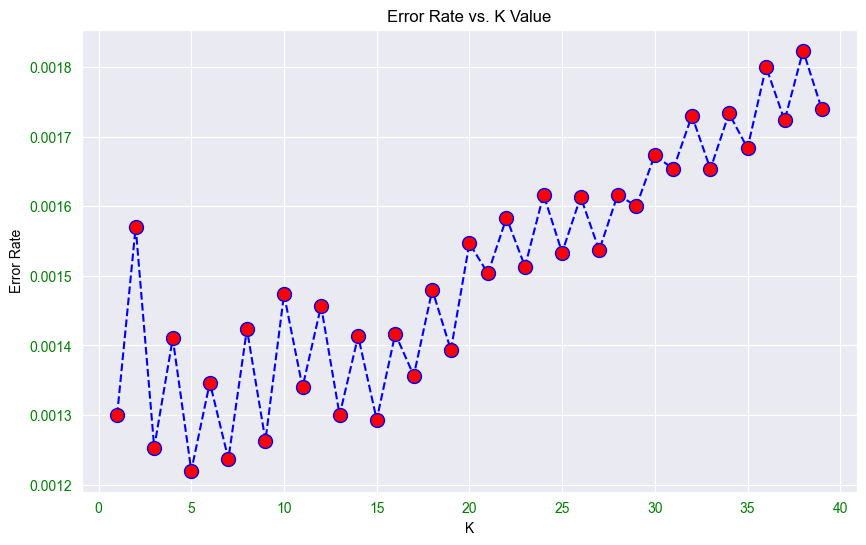

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)

ax.set_title('Error Rate vs. K Value', color='black')
ax.set_xlabel('K', color='black')
ax.set_ylabel('Error Rate', color='black')

ax.tick_params(axis='x', colors='green')
ax.tick_params(axis='y', colors='green')

plt.show()


In [48]:
knn_5 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_pred_5 = knn_5.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_5)
print(f'Model accuracy score with k=5: {accuracy:.4f}')

Model accuracy score with k=5: 0.9988


##### Error Rate vs. K Value Analysis:
The code iterates through different values of K from 1 to 40 and computes the error rate for each K value using the K-nearest neighbors (KNN) classifier. The error rate represents the proportion of incorrectly predicted instances in the test set. This information is stored in the error_rate list, and a line plot is generated to visualize the relationship between the error rate and the K value. The plot shows that the smallest error rate occurs when K equals 5.

#### Model Accuracy Score with K=5
After identifying K=5 as the optimal value based on the error rate, the code rebuilds the KNN classifier with K=5 and evaluates its accuracy on the test set. The accuracy score, which measures the proportion of correctly predicted instances, is calculated and printed. The model achieves an accuracy score of 0.9988 with K=5, indicating high accuracy in predicting the target variable compared to other K values.

##### Overall Performance Comparison
The analysis suggests that the model performs well with both K=3 and K=5, with K=5 yielding slightly better accuracy. However, the accuracy score alone does not provide insight into the types of errors made by the classifier. Further analysis, such as examining confusion matrices or precision-recall curves, is necessary to understand the classifier's performance comprehensively.

##### Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix and its components
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[273774    133]
 [   243  25850]]

True Positives(TP) =  273774

True Negatives(TN) =  25850

False Positives(FP) =  133

False Negatives(FN) =  243


We computed the confusion matrix using the true labels y_test and predicted labels y_pred obtained from our model. The confusion matrix has a dimension of 2x2, indicating a binary classification problem with two classes: positive (1) and negative (0). We printed the confusion matrix along with its components: True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN). These components provide insights into the performance of our classification model.

The confusion matrix represents the performance of a classification model. In this specific case, we analyzed a confusion matrix generated for a classification model. The matrix has four components: True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN). From the provided confusion matrix, we observed the following:

- ###### True Positives (TP): 273774
- ###### True Negatives (TN): 25850
- ###### False Positives (FP): 133
- ###### False Negatives (FN): 243

This matrix indicates that there were 273774 + 25850 = 299624 correct predictions and 133 + 243 = 376 incorrect predictions made by the model. These metrics provide insights into the model's ability to correctly classify instances into their respective classes and identify areas where the model may be making errors. The visualization of the confusion matrix using a heatmap further aids in understanding the distribution of correct and incorrect predictions.

Text(70.72222222222221, 0.5, 'True')

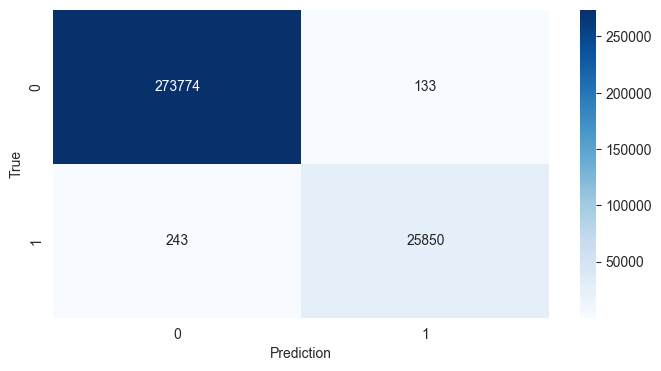

In [51]:
# Visualize confusion matrix with seaborn heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediction")
plt.ylabel("True")


Then, we visualized the confusion matrix using a heatmap generated with seaborn. The heatmap provides a graphical representation of the distribution of true positive, true negative, false positive, and false negative predictions. It confirms the numbers obtained from the confusion matrix and offers a clearer visualization of the classification performance.

#### Classification Metrices

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273907
         1.0       0.99      0.99      0.99     26093

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



We observe from the classification report that the precision, recall, and F1-score for both classes are exceptionally high, indicating excellent performance of the classification model. Class 0 (non-fraudulent transactions) has perfect precision, recall, and F1-score of 1.00, indicating that all non-fraudulent transactions are correctly classified. Class 1 (fraudulent transactions) also has high precision, recall, and F1-score of 0.99, indicating effective identification of most fraudulent transactions while minimizing false positives.

##### Classification accuracy

In [53]:
cm_5 = confusion_matrix(y_test, y_pred)
TP = cm_5[0,0]
TN = cm_5[1,1]
FP = cm_5[0,1]
FN = cm_5[1,0]

# Calculate classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9987


We find that the classification accuracy of the model is 99.87%, indicating that it correctly predicts the class label for the vast majority of instances in the test set.

##### Classification Error

In [54]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0013


The classification error rate is low at 0.13%, indicating that the model makes very few misclassifications, further affirming its high performance in distinguishing between fraudulent and non-fraudulent transactions.